<a href="https://colab.research.google.com/github/kkostromin/sber_ds/blob/main/GP2_GROUP7_House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Групповой проект 2: Соревнование

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data upload

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Classroom/GP2/data

/content/drive/My Drive/Classroom/GP2/data


In [4]:
%ls

catboost_info/   submission_catboost_model.csv  test.csv
submission2.csv  submission.csv                 train.csv


In [4]:
df_train = pd.read_csv('train.csv', sep = ',')
df_test = pd.read_csv('test.csv', sep = ',')
#ids = df_test['Id'].values.
df_train_graf = df_train

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
#save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

In [819]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [820]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Normolize

In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

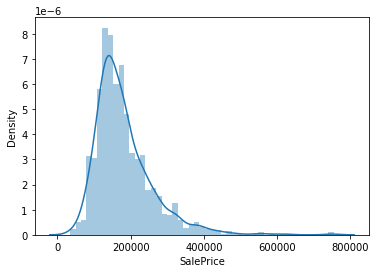

In [9]:
sns.distplot(df_train['SalePrice'])

Какие выводы можно сделать? Во-первых, кажется, данные выглят корректно (цена больше 0, нет явных выбросов) и есть явный тренд в сторону смещенного нормального распределения с мат.ожиданием в ~18000 и std ~ 79000 (довольно большой разброс).

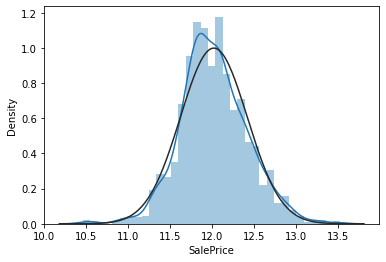

In [5]:
#log transformation
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit=norm);

In [11]:
#Remove Id column from numerical_data
#del numerical_data.Id
#numerical_data.drop(labels='Id')
numerical_data.columns

NameError: ignored

#Корреляционная матрица

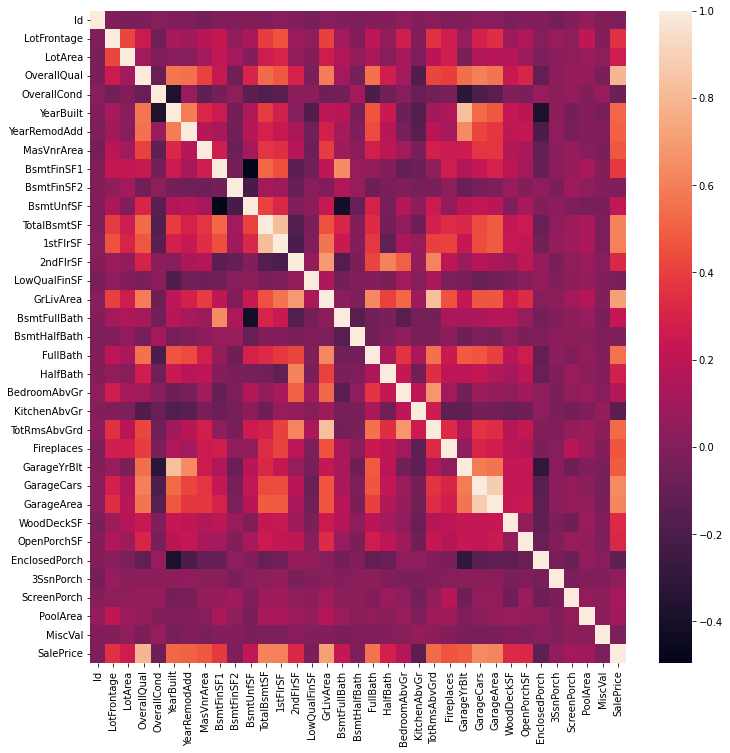

In [831]:
corr = numerical_data.corr()
#Plot the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr)


#Графики

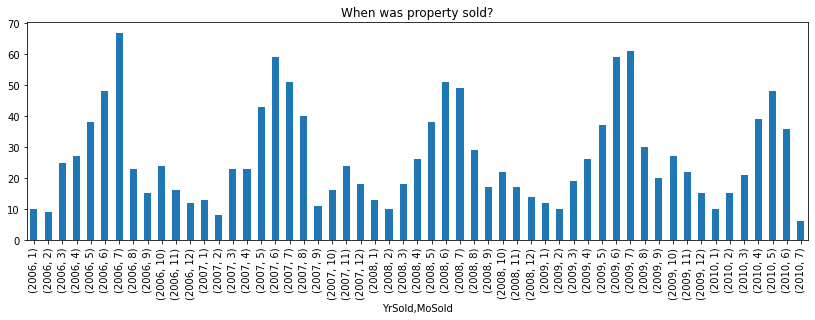

In [832]:
# When was property sold in which year and month
df_train_graf.groupby(['YrSold','MoSold']).Id.count().plot(kind = 'bar', figsize = (14,4))
plt.title('When was property sold?')
plt.show()

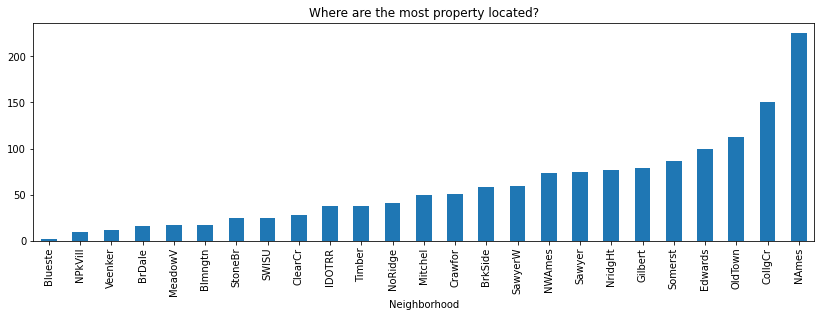

In [833]:
# Where are property located?
df_train_graf.groupby('Neighborhood').Id.count().\
      sort_values().\
      plot(kind = 'bar', figsize = (14,4))
plt.title('Where are the most property located?')
plt.show()

In [834]:
#Finding numerical feachers

numerical_data = df_train.select_dtypes(include = [np.number]) 

#Finding ccategorial feachers

categorial_data = df_train.select_dtypes(exclude = [np.number]) 

print('There are {0} numerical feachers and {1} categorial data in training dataset'.\
     format(numerical_data.shape[1],categorial_data.shape[1]))

There are 38 numerical feachers and 43 categorial data in training dataset


<Figure size 864x864 with 0 Axes>

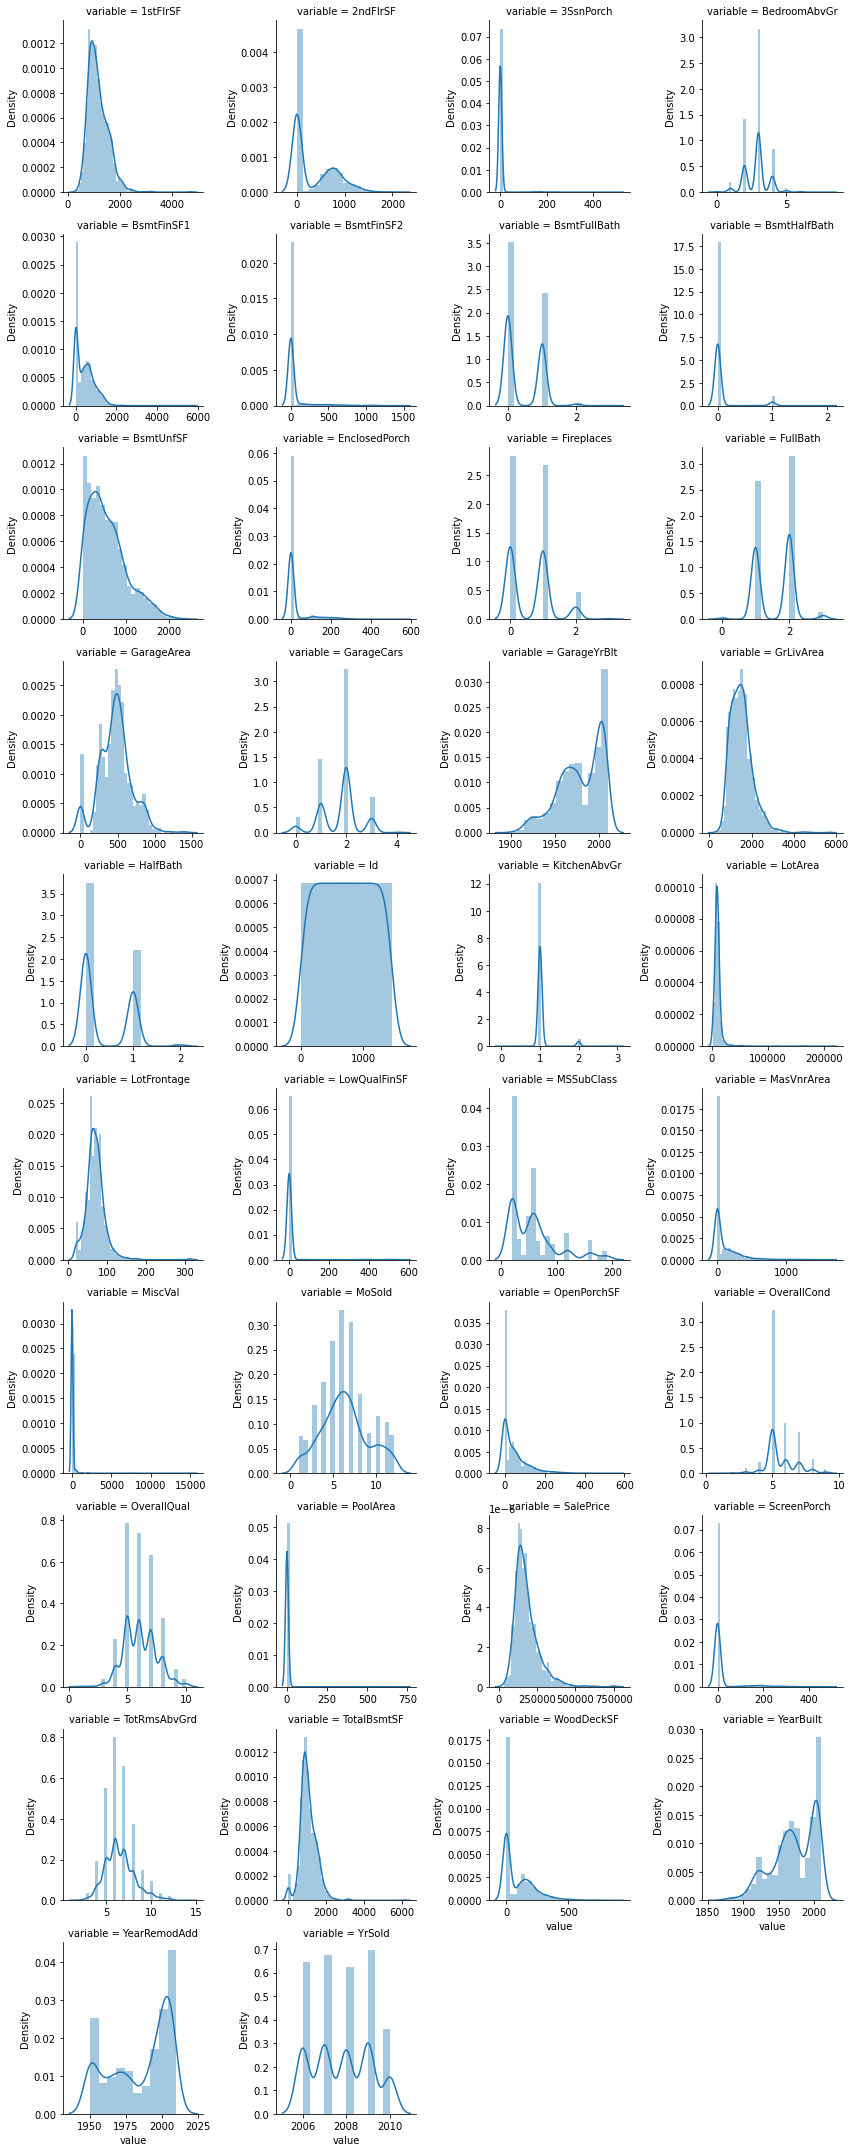

In [835]:
#Distributions of numerical features
plt.figure(figsize=(12, 12))
f = pd.melt(df_train, value_vars=sorted(numerical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

#Отрисовка категориальных признаков

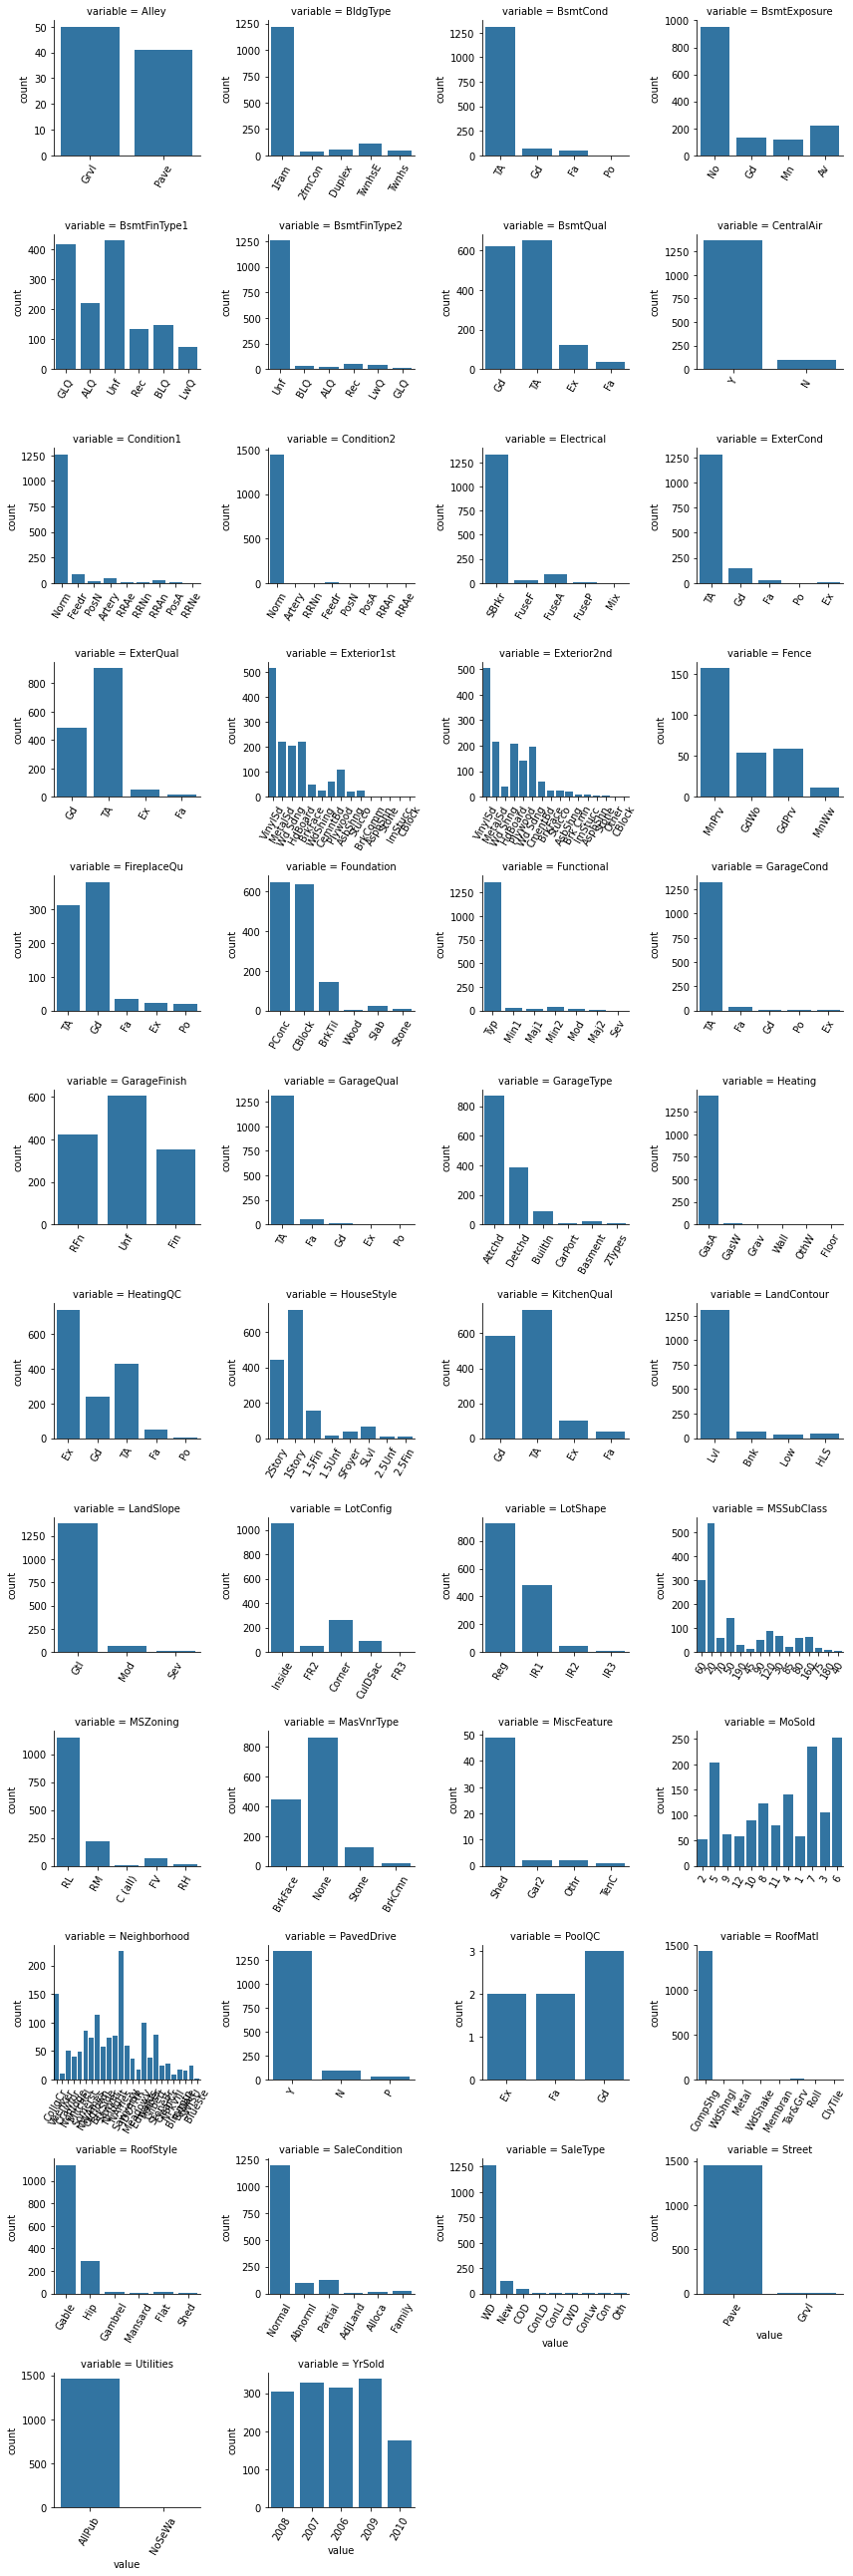

In [652]:
#Plot count of categorical features

f = pd.melt(df_train, value_vars=sorted(categorial_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()

plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [837]:
cat_to_num_features = ['Alley','BldgType','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond',
                       'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
                       'GarageCond','PavedDrive','PoolQC']

# 2 Data analise

#2.1.1 Выбросы

In [790]:
# df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
# df_train = df_train.drop(df_train['LotFrontage'][df_train['LotFrontage']>200].index)
# df_train = df_train.drop(df_train['LotArea'][df_train['LotArea']>100000].index)
# df_train = df_train.drop(df_train['BsmtFinSF1'][df_train['BsmtFinSF1']>4000].index)
# df_train = df_train.drop(df_train['TotalBsmtSF'][df_train['TotalBsmtSF']>6000].index)
# df_train = df_train.drop(df_train['1stFlrSF'][df_train['1stFlrSF']>4000].index)
# df_train = df_train.drop(df_train.GrLivArea[(df_train['GrLivArea']>4000)].index)
# df_train = df_train.drop(df_train.LowQualFinSF[df_train['LowQualFinSF']>550].index)



Удаление выбросов ухудшает результат

#Devide data

In [12]:
#concatenate train and test datasets, preprocess, and then divide them again
y_train = df_train['SalePrice']
df_all = pd.concat((df_train, df_test)).reset_index(drop=True)
df_all.drop(['SalePrice'], axis=1, inplace=True)
#df_all = df_train
#f_all = df_all.drop(['SalePrice'], axis=1, inplace=True)

# 2.1.2 Удаление кореляционных данных





In [13]:
#remove the highly correlated features to avoid the problem of multicollinearity
df_all.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

# 2.1.3 Removing features that have mostly just 1 value

In [14]:
#Categorical Features with almost 100% of the same value:  ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', "SaleType", "Electrical", "Functional" ]']
#Numerical Features with almost 100% of the same value:  ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF1', 'BsmtFinSF2']
df_all.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 
               '3SsnPorch', 'PoolArea', 'MiscVal', "SaleType", "Electrical", "Functional", 'BsmtFinSF1', 'BsmtFinSF2'], axis=1, inplace=True)

# 2.1.4 Removing features with a lot of missing values

In [841]:
#missing data
total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageType,157,5.378554


In [842]:
#drop columns
df_all.drop((missing_data[missing_data['Total'] > 200]).index, axis=1, inplace=True)
df_all.isnull().sum().sort_values(ascending=False)

GarageFinish     159
GarageCond       159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
Exterior2nd        1
TotalBsmtSF        1
BsmtUnfSF          1
KitchenQual        1
Exterior1st        1
PavedDrive         0
WoodDeckSF         0
KitchenAbvGr       0
BedroomAbvGr       0
Fireplaces         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
MoSold             0
FullBath           0
GrLivArea          0
YrSold             0
HalfBath           0
Id                 0
2ndFlrSF           0
CentralAir         0
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt    

# 2.2 Filling missing values

In [843]:
#numerical
numeric_missed = ['BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'MasVnrArea'
                  ]

for feature in numeric_missed:
    df_all[feature] = df_all[feature].fillna(df_all[feature].mean())    

In [844]:
#categorical
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd"]
df_all[cols] = df_all.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode()[0]))

cat = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1', 
       'GarageCond','GarageQual','BsmtCond','BsmtQual',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond']

df_all[cat] = df_all[cat].fillna("None")

In [845]:
df_all.isnull().any().any() 

False

In [846]:
df_all.isnull().any().head(60)

Id               False
MSSubClass       False
MSZoning         False
LotArea          False
LotShape         False
LandContour      False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
BsmtUnfSF        False
TotalBsmtSF      False
HeatingQC        False
CentralAir       False
2ndFlrSF         False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
Fireplaces       False
GarageType 

## 2.3 Converting categorical to numerical

In [847]:
cat_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual',
           'GarageQual','GarageCond', 'BsmtFinType2','BsmtFinType1', 'BsmtExposure', 'GarageFinish']
#cat_col = ['GarageQual','GarageCond', 'BsmtFinType2','BsmtFinType1', 'BsmtExposure', 'GarageFinish']
cat_feature_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0,
                   'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0,
                   'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0,
                   'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1, 'Fin': 4, 'RFn': 2, 'Unf': 1, 'NA': 0}

for col in cat_col:
    df_all[col] = df_all[col].map(cat_feature_map)

In [848]:
df_all['MSSubClass'] = df_all['MSSubClass'].apply(str)

In [849]:
df_all = pd.get_dummies(df_all)

In [850]:
#Split back into train-set set
df_train = df_all.loc[df_train.index]
y_train = y_train.loc[df_train.index]
df_test = df_all.loc[df_test.index]

# 3 Modeling

#3.1 Scaling of Data

In [851]:
from sklearn.preprocessing import RobustScaler

cols = df_train.select_dtypes(np.number).columns
transformer = RobustScaler().fit(df_train[cols])
df_train[cols] = transformer.transform(df_train[cols])
df_test[cols] = transformer.transform(df_test[cols])

In [852]:
#Split into train-validation set
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

X_train, X_val, y_train, y_val = train_test_split(df_train, y_train, test_size=0.2, random_state=1000)

#3.2 Models

In [853]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

import xgboost

#LR

In [858]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

print("TRAIN")
y_pred = model_lr.predict(X_train)
print(f"RMSE:       {mean_squared_error(y_train, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_train+1, y_pred+1)}")
print("TEST")
y_pred_LR = model_lr.predict(X_val)
print(f"RMSE:       {mean_squared_error(y_val, y_pred_LR) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_val+1, y_pred_LR+1)}")

TRAIN
RMSE:       27502.39880562239
MAPE:      0.10240689746200184
TEST
RMSE:       30343.586764325595
MAPE:      0.12754804707040354


#KNN

In [873]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)

print("TRAIN")
y_pred = model.predict(X_train)
print(f"RMSE:       {mean_squared_error(y_train, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_train+1, y_pred+1)}")
print("TEST")
y_pred_KNN = model.predict(X_val)
print(f"RMSE:       {mean_squared_error(y_val, y_pred_KNN) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_val+1, y_pred_KNN+1)}")

TRAIN
RMSE:       37658.10649777605
MAPE:      0.12493961153358671
TEST
RMSE:       47718.17964350981
MAPE:      0.15699036985933826


#XGBRegressor wirtout parameters

In [807]:
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [855]:
import xgboost as XGB

XGB_model = XGB.XGBRegressor()
XGB_model.fit(X_train, y_train)

print("TRAIN")
y_pred = XGB_model.predict(X_train)
print(f"RMSE:       {mean_squared_error(y_train, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_train+1, y_pred+1)}")
print("TEST")
y_pred = XGB_model.predict(X_val)
print(f"RMSE:       {mean_squared_error(y_val, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_val+1, y_pred+1)}")

grid_XGB = RandomizedSearchCV(
            XGB.XGBRegressor(verbose=0),         
            param_distributions = {                 
                'max_depth': range(2, 7),
                'lr': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'neg_mean_absolute_error',    
            cv = 3,                                 
            n_jobs = -1,                            
            return_train_score = True,              
            n_iter=30,                              
            verbose = 5,                            
        )

grid_XGB.fit(X_train, y_train)

print("TRAIN")
y_pred = grid_XGB.best_estimator_.predict(X_train)
print(f"RMSE:       {mean_squared_error(y_train, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_train+1, y_pred+1)}")
print("TEST")
y_pred_XGB = grid_XGB.best_estimator_.predict(X_val)
print(f"RMSE:       {mean_squared_error(y_val, y_pred_XGB) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_val+1, y_pred_XGB+1)}")

[00:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN
RMSE:       15054.99729715016
MAPE:      0.06718556034676722
TEST
RMSE:       24584.279367455292
MAPE:      0.09502502098120567
Fitting 3 folds for each of 30 candidates, totalling 90 fits
[00:03:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN
RMSE:       10798.825176724182
MAPE:      0.049673087354268716
TEST
RMSE:       24916.288684541814
MAPE:      0.09149294118357895


#XGBRegressor wirt parameters

In [859]:
import xgboost as XGB

XGB_model_2 = XGB.XGBRegressor(reg_lambda=0.8571, n_estimators=2200, nthread = -1)
XGB_model.fit(X_train, y_train)

print("TRAIN")
y_pred_1 = XGB_model.predict(X_train)
print(f"RMSE:       {mean_squared_error(y_train, y_pred_1) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_train+1, y_pred_1+1)}")
print("TEST")
y_pred_2 = XGB_model.predict(X_val)
print(f"RMSE:       {mean_squared_error(y_val, y_pred_2) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_val+1, y_pred_2+1)}")

grid_XGB = RandomizedSearchCV(
            XGB.XGBRegressor(verbose=0),          
            param_distributions = {                 
                'max_depth': range(2, 7),
                'lr': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'neg_mean_absolute_error',    
            cv = 3,                                 
            n_jobs = -1,                            
            return_train_score = True,              
            n_iter=30,                              
            verbose = 5,                            
        )

grid_XGB.fit(X_train, y_train)

print("TRAIN")
y_pred = grid_XGB.best_estimator_.predict(X_train)
print(f"RMSE:       {mean_squared_error(y_train, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_train+1, y_pred+1)}")
print("TEST")
y_pred_XGB = grid_XGB.best_estimator_.predict(X_val)
print(f"RMSE:       {mean_squared_error(y_val, y_pred_XGB) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_val+1, y_pred_XGB+1)}")

[00:05:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN
RMSE:       15182.284289237921
MAPE:      0.06742799404498936
TEST
RMSE:       24777.003410466292
MAPE:      0.09456807084742028
Fitting 3 folds for each of 30 candidates, totalling 90 fits
[00:06:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN
RMSE:       7820.722402707078
MAPE:      0.037309135860086426
TEST
RMSE:       25603.602966955237
MAPE:      0.09432330706373573


Вывод- изменение параметров в модели grid_XGB не дает прироста на датасете

In [860]:
y_pred_1.shape

(1168,)

#LGBMRegressor

LightGBM – библиотека от Microsoft. В ней идет добавление авто выбора объектов и фокуса на тех частях бустинга, в которых мы имеем больший градиент. Это способствует значительному ускорению в обучении модели и улучшению показателей предсказания. Основная сфера применения – соревнования с использованием табличных данных на Kaggle.

In [862]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [863]:
from lightgbm import LGBMRegressor

LGBM_model = LGBMRegressor()

LGBM_model.fit(X_train, y_train)


LGBMRegressor()

In [864]:
print("TRAIN")
y_pred = LGBM_model.predict(X_train)
print(f"RMSE:       {mean_squared_error(y_train, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_train+1, y_pred+1)}")
print("TEST")
y_pred = LGBM_model.predict(X_val)
print(f"RMSE:       {mean_squared_error(y_val, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_val+1, y_pred+1)}")

TRAIN
RMSE:       12868.734110180516
MAPE:      0.03330993774801762
TEST
RMSE:       26765.083640368743
MAPE:      0.09548140294612244


Вывод: LGBMRegressor не дает прироста в точности

#catboost

In [680]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [865]:
#import catboost as cb

from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(verbose=0, n_estimators=100)

catboost_model.fit(X_train, y_train)

In [577]:
print("TRAIN")
y_pred = catboost_model.predict(X_train)
print(f"RMSE:       {mean_squared_error(y_train, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_train+1, y_pred+1)}")
print("TEST")
y_pred = catboost_model.predict(X_val)
print(f"RMSE:       {mean_squared_error(y_val, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_val+1, y_pred+1)}")

TRAIN
RMSE:       36916.37248223092
MAPE:      0.18049103120064103
TEST
RMSE:       73987.73792998666
MAPE:      0.36480825141640055


#Lasso 

In [869]:
X_test , X_val_test = X_train, X_val

In [870]:
X_test.fillna(0,inplace=True)
X_val_test.fillna(0,inplace=True)


In [871]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(X_test, y_train)

Lasso(alpha=0.0005, random_state=5)

In [872]:
print("TRAIN")
y_pred = lasso_model.predict(X_train)
print(f"RMSE:       {mean_squared_error(y_train, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_train+1, y_pred+1)}")
print("TEST")
y_pred = lasso_model.predict(X_val)
print(f"RMSE:       {mean_squared_error(y_val, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_val+1, y_pred+1)}")

TRAIN
RMSE:       27502.398805875062
MAPE:      0.10240686702247473
TEST
RMSE:       30351.096730436228
MAPE:      0.1276403224090031


#RandomForest

In [874]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

print("TRAIN")
y_pred = RFR.predict(X_train)
print(f"RMSE:       {mean_squared_error(y_train, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_train+1, y_pred+1)}")
print("TEST")
y_pred = RFR.predict(X_val)
print(f"RMSE:       {mean_squared_error(y_val, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_val+1, y_pred+1)}")

TRAIN
RMSE:       11877.282508501932
MAPE:      0.0394629750714914
TEST
RMSE:       25616.25400469928
MAPE:      0.09941401529240927


In [875]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
DTR = DecisionTreeRegressor(max_depth=5)
DTR.fit(X_train, y_train)

print("TRAIN")
y_pred = DTR.predict(X_train)
print(f"RMSE:       {mean_squared_error(y_train, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_train+1, y_pred+1)}")
print("TEST")
y_pred = DTR.predict(X_val)
print(f"RMSE:       {mean_squared_error(y_val, y_pred) ** 0.5}")
print(f"MAPE:      {mean_absolute_percentage_error(y_val+1, y_pred+1)}")

TRAIN
RMSE:       29957.880811404426
MAPE:      0.1340039899571217
TEST
RMSE:       36570.40185550173
MAPE:      0.1561793781662451


#Result

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model_performances = pd.DataFrame({
    "Model" : ["LineRegression", "KNN", "DecisionTree", "RandomForest", "XGBoost", "XGBoost with param" , "LGBM", "CatBoost"],
    "RMSE" : [mean_squared_error(y_val, y_pred_LR) ** 0.5, mean_squared_error(y_val, y_pred_KNN) ** 0.5, mean_squared_error(y_val, y_pred_DTR) ** 0.5, \
              mean_squared_error(y_val, y_pred_RFR) ** 0.5, mean_squared_error(y_val, y_pred_XGB) ** 0.5, mean_squared_error(y_val, y_pred_LGB) ** 0.5, \
              mean_squared_error(y_val, y_pred_CB) ** 0.5],
    "MAPE" : [mean_absolute_error(y_val, y_pred_LR), mean_absolute_error(y_val, y_pred_KNN),\
              mean_absolute_error(y_val, y_pred_DTR),mean_absolute_error(y_val, y_pred_RFR), \
              mean_absolute_error(y_val, y_pred_XGB),mean_absolute_error(y_val, y_pred_LGB), \
              mean_absolute_error(y_val, y_pred_CB)],
    "R2" : [r2_score(y_val, y_pred_LR), r2_score(y_val, y_pred_KNN),\
              r2_score(y_val, y_pred_DTR),r2_score(y_val, y_pred_RFR), \
              r2_score(y_val, y_pred_XGB),r2_score(y_val, y_pred_LGB), \
              r2_score(y_val, y_pred_CB)]
})

model_performances

#output

In [145]:
#y_pred_df = LGBM_model.predict(df_test)
y_pred_df = catboost_model.predict(df_test)

In [147]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred_df
sub.to_csv('submission_catboost_model.csv',index=False)

#Old

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

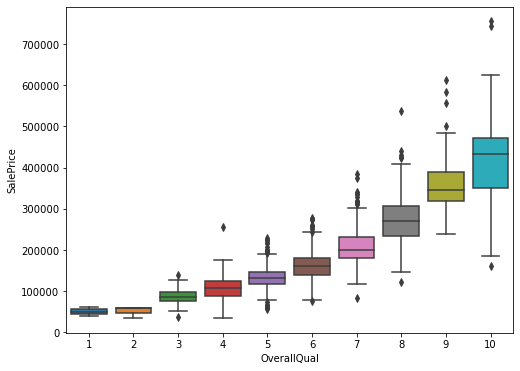

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y="SalePrice", data=data)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

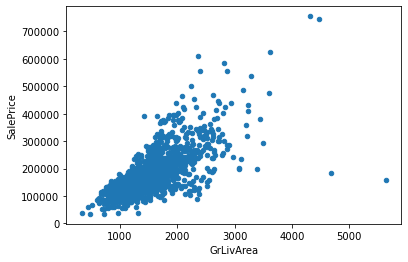

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

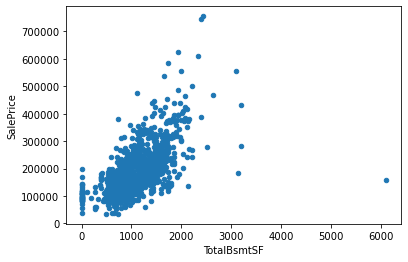

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice')

Для численных переменных(TotalBsmtSF, GrLivArea) наблюдаем линейный тренд

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

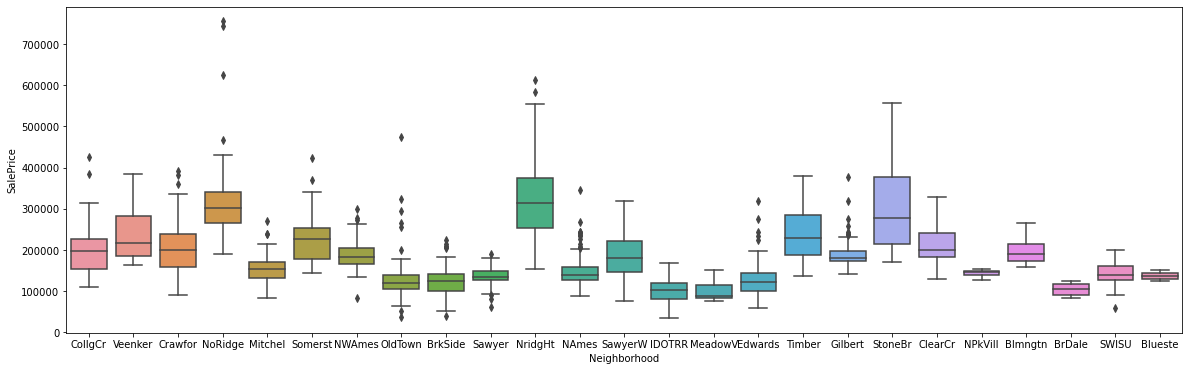

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['Neighborhood']], axis=1)
plt.figure(figsize=(20, 6))
sns.boxplot(x='Neighborhood', y="SalePrice", data=data)

Какой-то явной теенденции нет, но при этом можно выделить, например, дорогие районы(хоть и с очень большим разбросом) и местное "Гетто" - BrDale

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [ ]:
x_train = x_train.drop((missing_data[missing_data['Total'] > 81]).index,1)
x_train = x_train.apply(lambda x:x.fillna(x.value_counts().index[0]))
x_train.isnull().sum().max()

0

In [ ]:
x_train.shape

(1460, 74)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_test = df_test.drop((missing_data[missing_data['Total'] > 81]).index,1)
df_test = df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
df_test

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [ ]:
x_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

In [ ]:
x_train.shape

(1460, 73)

Энкодинг категориальных переменных - переводим в численные значения. аналогично для теста

In [ ]:
x_train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = x_train.select_dtypes(include='object').columns

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(x_train[c].values)) 
    x_train[c] = lbl.transform(list(x_train[c].values))
    df_test[c] = lbl.transform(list(df_test[c].values))

print('Shape all_data: {}'.format(x_train.shape))

Shape all_data: (1460, 73)


In [ ]:
indexes = x_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index 

x_train = x_train.drop(indexes)
y_train = np.delete(y_train, indexes)

In [ ]:
y_train.shape

(1458,)